<a href="https://colab.research.google.com/github/BiyaMe/Clustering/blob/main/cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>Here we are importing the important libraries that we need. Like Load_Iris for dataset, scikit for preprocessing, for algorithm, and for analyzing the data, and matplot lib for ploting. In the last line we are importing the Iris dataset.



In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris(as_frame=True)

In this block, we are doing two things. The first thing is renaming the columns of the Iris dataset to a more descriptive names. The second thing we are doing here is displaying the first few rows of the dataset to get a very quick look at the the dataset structure and content.

In [5]:
iris.feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In this block we are doing a whole lotta things. The basic thing that we are doing is reducing our data. The '(n_components=2)' tells that we want to reduce the dataset into 2 principal components using PCA. The 'fit' is used to calculate the principal componentsbased on the input data i.e. (iris_data). The 'transform' is used to to transform the original dato into 2 princial components. After all that is done we are printing out our transformed data with it's shape and displaying the first 5 rows of the reduced data.

In [11]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)
print(f"X_reduced shape: {X_reduced.shape}, first few enteries: {X_reduced[:5]}")

X_reduced shape: (150, 2), first few enteries: [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


This block is used to draw a scatterplot. It does this by using the x-axis and the y-axis as a reference like a graph.

<Axes: >

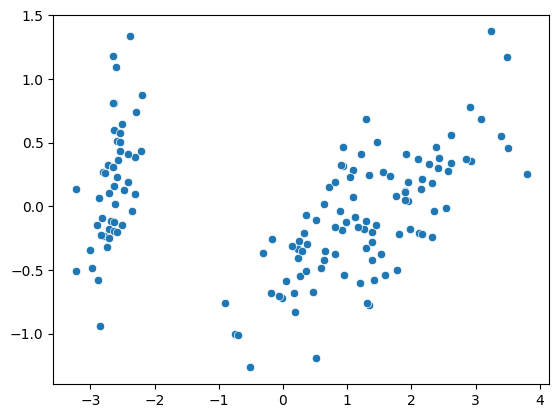

In [17]:
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1])

This block's job is to turn the dataset's data into a NumPy array and the display its shape. This is done by accessin the data attribute of the iris object and then calls the to_numpy function to convert it into NumPy array and then using the '.shape' method displaying the the array.

In [13]:
data_numpy = iris.data.to_numpy()
data_numpy.shape

(150, 4)

In this block we can see, the value of k being assigned a value. And then the next line initiates the KMenas clustering model. The 'kmeans.fit(data_numpy)' fits the KMeans model to the data_numpy array. After all this is done, the last line creates a new instance that generates a random number that is provided by the NumPy.


In [15]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_numpy)

rng = np.random.default_rng()

In this block first we initialize empty lists all_assignments and variance_sums to store clustering results and variance values.After that we run a loop 10 times(10 restarts) to see different initializations of the KMeans algorithm. For each restart, we initialize and fit a standard KMeans model. Then we create and re-initialize cluster centers randomly using a random number generator. After that we implement a custom KMeans iteration with cluster assignment and center update steps until convergence.
Lastly the last lines of the loop calculate and print the variance sum, silhouette score, and cluster centers for each run. The cluster assignments and variance sums are then stored.

In [16]:
all_assignments = []
variance_sums = []

for restart in range(10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_numpy)
    #create random centers
    cluster_centers = rng.choice(data_numpy, size=k, replace=False)
    for i in range(k):
        random_index = int(data_numpy.shape[0] * rng.random())
        cluster_centers[i] = data_numpy[random_index]

    old_cluster_centers = np.zeros((k, data_numpy.shape[1]))
    #while  -check if the centers are changed
    while np.linalg.norm(old_cluster_centers - cluster_centers) > 0:
        cluster_per_datapoint = np.zeros(data_numpy.shape[0])
        for i in range(data_numpy.shape[0]):
            distances = [np.linalg.norm(data_numpy[i] - center) for center in cluster_centers]
            nearest_center = np.argmin(distances)
            cluster_per_datapoint[i] = nearest_center

        old_cluster_centers = cluster_centers.copy()
        cluster_centers = np.zeros((k, data_numpy.shape[1]))
        for i in range(k):
            cluster_centers[i] = np.mean(data_numpy[cluster_per_datapoint == i], axis=0)

        cluster_centers

    variance_sum = 0
    for cluster_index in range(k):
        variance_sum += np.sum((data_numpy[cluster_per_datapoint == cluster_index] - cluster_centers[cluster_index])**2)
    print(f"Variance sum: {variance_sum}")
    print(f"Silhouette score: {silhouette_score(data_numpy, cluster_per_datapoint)}")
    print(f"Cluster centers: {cluster_centers}")
    variance_sums.append(variance_sum)
    all_assignments.append(cluster_per_datapoint.copy())


Variance sum: 78.8556658259773
Silhouette score: 0.5511916046195927
Cluster centers: [[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Variance sum: 78.85566582597731
Silhouette score: 0.5511916046195927
Cluster centers: [[5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
Variance sum: 78.8556658259773
Silhouette score: 0.5511916046195927
Cluster centers: [[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]]
Variance sum: 142.7540625
Silhouette score: 0.5185675688773284
Cluster centers: [[6.31458333 2.89583333 4.97395833 1.703125  ]
 [5.19375    3.63125    1.475      0.271875  ]
 [4.73181818 2.92727273 1.77272727 0.35      ]]
Variance sum: 78.85144142614601
Silhouette score: 0.5528190123564102
Cluster centers: [[5.006   